In [1]:
import numpy as np
from scipy.signal import savgol_filter
from scipy.interpolate import griddata

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl

import sys
sys.path.append("../")
import GSHEWaveform

# Functions to turn on and off custom plotting
def default_mplstyle():
    mpl.rcParams.update(mpl.rcParamsDefault)
    
def custom_mplstyle():
    mpl.style.use("../plot_style.txt")
    
def ylabel_with_offset(ax, label):
    ax.yaxis.offsetText.set_visible(False)
    offset = ax.yaxis.get_major_formatter().get_offset()
    ax.set_ylabel(r"{} {}".format(label, offset))

def spin_indtoval(s):
    if s == 0:
        return "+2"
    else:
        return "-2"
    
%load_ext autoreload
%autoreload 2

# Dependence on $\theta_{\rm obs}$

In [23]:
runID = "01"


Xgeos = np.load("../data/{}_Xgeos.npy".format(runID))
Xgshes = np.load("../data/{}_Xgshes.npy".format(runID))
epsilons = np.load("../data/{}_Epsilons.npy".format(runID))
alphas = np.load("../data/{}_alphas.npy".format(runID))
betas = np.load("../data/{}_betas.npy".format(runID))
thetaobs = np.load("../data/{}_VaryParam.npy".format(runID))

# k = 80
# print(x[k]/np.pi)

# Xgeo = Xgeos[k, ...]
# Xgshe = Xgshes[k, ...]

<IPython.core.display.Javascript object>


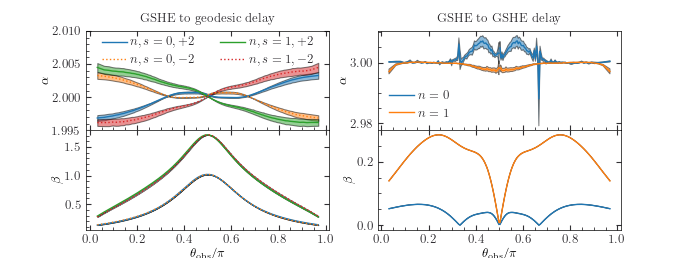

In [56]:
custom_mplstyle()
polardict = {0: "+2", 1: "-2"}
polarls = {0: "-", 1: "dotted"}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(3.45*2, 3.45*0.75), sharex='col')
fig.subplots_adjust(hspace=0, wspace=0.2)


for n in range(2):
    for s in range(2):
        for k, par in enumerate([alphas, betas]):
            mu = par[:, n, s, 0]
            std = par[:, n, s, 1]
            lower = mu - std
            upper = mu + std
            
            if k == 0:
                label = r"$n, s = {},{}$".format(n, polardict[s])
            else:
                label = None

            axes[k, 0].plot(thetaobs/np.pi, mu, label=label, ls=polarls[s])
            axes[k, 0].fill_between(thetaobs/np.pi, mu - std, mu + std, alpha=0.5)


for n in range(2):
    for k, par in enumerate([alphas, betas]):
        mu = par[:, n, 2, 0]
        std = par[:, n, 2, 1]

        if k == 0:
            label = r"$n = {}$".format(n)
        else:
            label = None

        axes[k, 1].plot(thetaobs/np.pi, mu, label=label)
        axes[k, 1].fill_between(thetaobs/np.pi, mu - std, mu + std, alpha=0.5)

        
        
for i in range(2):
    axes[1, i].set_xlabel(r"$\theta_{\rm obs} / \pi$")
    axes[0, i].set_ylabel(r"$\alpha$")
    axes[1, i].set_ylabel(r"$\beta$")
    
axes[0, 0].set_title("GSHE to geodesic delay")
axes[0, 1].set_title("GSHE to GSHE delay")
axes[0, 0].set_ylim(1.995, 2.01)
axes[0, 0].legend(ncol=2, loc=9, bbox_to_anchor=(0.5, 1.05))
# axes[0, 0].legend(ncol=2, loc="best")
# axes[0, 0].set_ylim(1.995, 2.009)
# axes[0, 1].legend(ncol=2, loc=9, bbox_to_anchor=(0.5, 1.25))
axes[0, 1].legend(ncol=1, loc="best")

fig.savefig("/Users/richard/Downloads/powerlaw_fit.pdf", dpi=400, bbox_inches="tight") 
fig.show()

# Dependence on $r_{\rm src}$

In [11]:
runID = "08"

with open("../data/{}_Description.txt".format(runID)) as f:
    description = f.read()
print(description)


Xgeos = np.load("../data/{}_Xgeos.npy".format(runID))
Xgshes = np.load("../data/{}_Xgshes.npy".format(runID))
epsilons = np.load("../data/{}_Epsilons.npy".format(runID))
alphas = np.load("../data/{}_alphas.npy".format(runID))
betas = np.load("../data/{}_betas.npy".format(runID))
rsrc = np.load("../data/{}_VaryParam.npy".format(runID)) / 2

m = rsrc < 15
alphas = betas[m, ...]
betas = betas[m, ...]
rsrc = rsrc[m]

Varying the r source
Source:
GSHEIntegrator.SphericalCoords{Float64}
  t: Float64 0.0
  r: Float64 2.5
  θ: Float64 1.5707963267948966
  ϕ: Float64 0.0

Observer:
GSHEIntegrator.SphericalCoords{Float64}
  t: Float64 0.0
  r: Float64 100.0
  θ: Float64 1.2566370614359172
  ϕ: Float64 2.356194490192345

BH spin
a = 0.99
ODE Options
GSHEIntegrator.ODESolverOptions
  reltol: Float64 1.0e-14
  abstol: Float64 1.0e-14
  maxiters: Int64 5000
  interp_points: Int64 10
  Δθ: Float64 0.0005
  horizon_tol: Float64 1.01
  no_loops: Bool true
  verbose: Bool false

GSHEIntegrator.OptimiserOptions
  radius_reltol: Float64 1.0e-10
  angdist_to_old: Float64 1.0e-9
  τ_to_old: Float64 1.0e-9
  Nattempts_geo: Int64 100
  Nattempts_gshe: Int64 20
  loss_atol: Float64 1.0e-12
  optim_options: Optim.Options{Float64, Nothing}
  alg: Optim.NelderMead{Optim.AffineSimplexer, Optim.AdaptiveParameters}
  θmax0: Float64 0.04
  gshe_convergence_verbose: Bool false




<IPython.core.display.Javascript object>


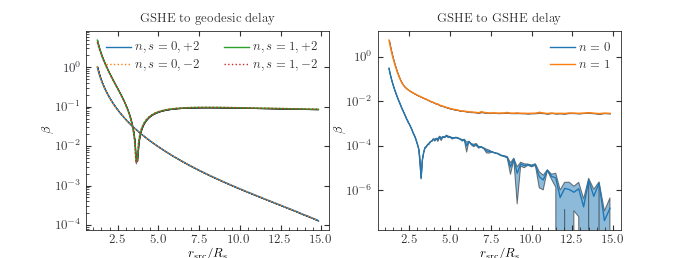

In [21]:
custom_mplstyle()
polardict = {0: "+2", 1: "-2"}
polarls = {0: "-", 1: "dotted"}

fig, axes = plt.subplots(ncols=2, figsize=(3.45*2, 3.45*0.75))
fig.subplots_adjust(hspace=0, wspace=0.2)


for n in range(2):
    for s in range(2):
        mu = betas[:, n, s, 0]
        std = betas[:, n, s, 1]
            
        label = r"$n, s = {},{}$".format(n, polardict[s])
        axes[0].plot(rsrc, mu, label=label, ls=polarls[s])
        axes[0].fill_between(rsrc, mu - std, mu + std, alpha=0.5)


for n in range(2):
    mu = betas[:, n, 2, 0]
    std = betas[:, n, 2, 1]
        
    label = r"$n = {}$".format(n)

    axes[1].plot(rsrc, mu, label=label)
    axes[1].fill_between(rsrc,mu - std, mu+std, alpha=0.5)

        
for i in range(2):
    axes[i].set_xlabel(r"$r_{\rm src} / R_{\rm s}$")
    axes[i].set_ylabel(r"$\beta$")
    axes[i].set_yscale("log")
    


axes[0].set_title("GSHE to geodesic delay")
axes[1].set_title("GSHE to GSHE delay")

axes[0].legend(ncol=2, loc="best")
axes[1].legend(ncol=1, loc="best")


fig.savefig("/Users/richard/Downloads/radial_powerlaw_fit.pdf", dpi=400, bbox_inches="tight") 
fig.show()

# Dependence on $a$

In [57]:
runID = "09"


with open("../data/{}_Description.txt".format(runID)) as f:
    description = f.read()

print(description)

Xgeos = np.load("../data/{}_Xgeos.npy".format(runID))
Xgshes = np.load("../data/{}_Xgshes.npy".format(runID))
epsilons = np.load("../data/{}_Epsilons.npy".format(runID))
alphas = np.load("../data/{}_alphas.npy".format(runID))
betas = np.load("../data/{}_betas.npy".format(runID))
BHspin = np.load("../data/{}_VaryParam.npy".format(runID))

Varying the BH spin
Source:
GSHEIntegrator.SphericalCoords{Float64}
  t: Float64 0.0
  r: Float64 4.0
  θ: Float64 1.5707963267948966
  ϕ: Float64 0.0

Observer:
GSHEIntegrator.SphericalCoords{Float64}
  t: Float64 0.0
  r: Float64 100.0
  θ: Float64 1.2566370614359172
  ϕ: Float64 3.141592653589793

BH spin
a = 0.001
ODE Options
GSHEIntegrator.ODESolverOptions
  reltol: Float64 1.0e-14
  abstol: Float64 1.0e-14
  maxiters: Int64 5000
  interp_points: Int64 10
  Δθ: Float64 0.0005
  horizon_tol: Float64 1.01
  no_loops: Bool true
  verbose: Bool false

GSHEIntegrator.OptimiserOptions
  radius_reltol: Float64 1.0e-10
  angdist_to_old: Float64 1.0e-9
  τ_to_old: Float64 1.0e-9
  Nattempts_geo: Int64 30
  Nattempts_gshe: Int64 10
  loss_atol: Float64 1.0e-12
  optim_options: Optim.Options{Float64, Nothing}
  alg: Optim.NelderMead{Optim.AffineSimplexer, Optim.AdaptiveParameters}
  θmax0: Float64 0.04
  gshe_convergence_verbose: Bool false




<IPython.core.display.Javascript object>


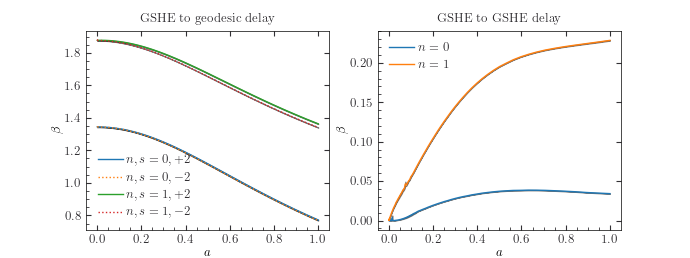

In [59]:
custom_mplstyle()
polardict = {0: "+2", 1: "-2"}
polarls = {0: "-", 1: "dotted"}

fig, axes = plt.subplots(ncols=2, figsize=(3.45 * 2, 3.45*0.75))
fig.subplots_adjust(hspace=0, wspace=0.2)


for n in range(2):
    for s in range(2):
        mu = betas[:, n, s, 0]
        std = betas[:, n, s, 1]

        label = r"$n, s = {},{}$".format(n, polardict[s])

        axes[0].plot(BHspin, mu, label=label, ls=polarls[s])
        axes[0].fill_between(BHspin, mu - std, mu + std, alpha=0.5)


for n in range(2):
    mu = betas[:, n, 2, 0]
    std = betas[:, n, 2, 1]

    label = r"$n = {}$".format(n)

    axes[1].plot(BHspin, mu, label=label)
    axes[1].fill_between(BHspin, mu - std, mu + std, alpha=0.5)

        
        
for i in range(2):
    axes[i].set_xlabel(r"$a$")
    axes[i].set_ylabel(r"$\beta$")
    axes[i].legend(ncol=1, loc="best")
    
axes[0].set_title("GSHE to geodesic delay")
axes[1].set_title("GSHE to GSHE delay")

fig.savefig("/Users/richard/Downloads/BHspin_fit.pdf", dpi=400, bbox_inches="tight") 
fig.show()

# Dependence on geodesic direction

In [2]:
runID = "11"


with open("../data/run_{}/Description.txt".format(runID)) as f:
    description = f.read()
# print(description)


Xgeo = np.load("../data/run_{}/Xgeos.npy".format(runID))
Xgshe = np.load("../data/run_{}/Xgshes.npy".format(runID))
epsilons = np.load("../data/run_{}/Epsilons.npy".format(runID))
alphas = np.load("../data/run_{}/alphas.npy".format(runID))
betas = np.load("../data/run_{}/betas.npy".format(runID))
xs = np.load("../data/run_{}/dir1.npy".format(runID))
ys = np.load("../data/run_{}/dir2.npy".format(runID))


X, Y = np.meshgrid(xs, ys)

N = 500
high_xs = high_ys = np.linspace(-1, 1, N)

highX, highY = np.meshgrid(high_xs, high_ys)

In [3]:
dalpha = 5

ind = np.where((np.abs(alphas[:, 0] - 2) > dalpha))[0]
print(ind)

alphas[ind, ...] = np.nan
betas[ind, ...] = np.nan

[]


## A histogram of $\alpha$ and $\beta$

<IPython.core.display.Javascript object>


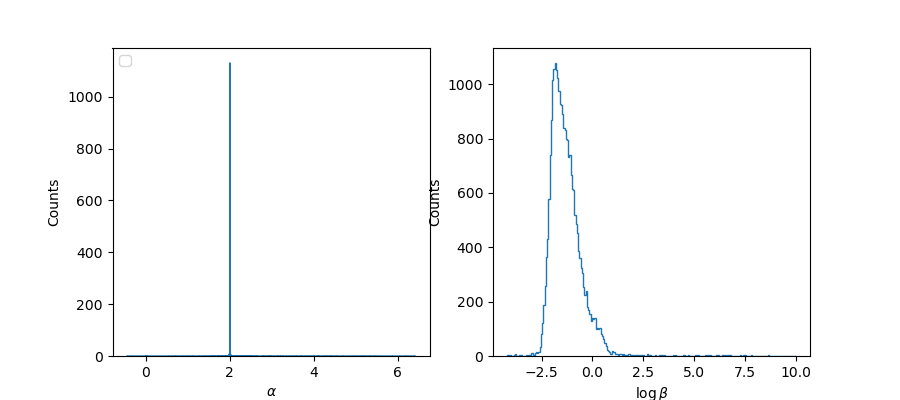

No handles with labels found to put in legend.


1.999991158950579 2.010847985477835 0.17114267913711426
0.03587350063557544 1127672.3810336823 81362326.19954853


In [4]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4))


x = alphas[:, 0]
x = x[~np.isnan(x)]
print(np.median(x), np.mean(x), np.std(x))
axes[0].hist(x, bins="auto", histtype="step")

x = betas[:, 0]
x = x[~np.isnan(x)]
print(np.median(x), np.mean(x), np.std(x))
axes[1].hist(np.log10(x), bins="auto", histtype="step")

axes[0].set_xlabel(r"$\alpha$")
axes[1].set_xlabel(r"$\log \beta$")
axes[0].legend(loc=2)
for i in range(2):
    axes[i].set_ylabel("Counts")
    
# plt.savefig("/Users/richard/Downloads/betas_count.png")
fig.show()

[6.41723136 0.44188992]


<IPython.core.display.Javascript object>


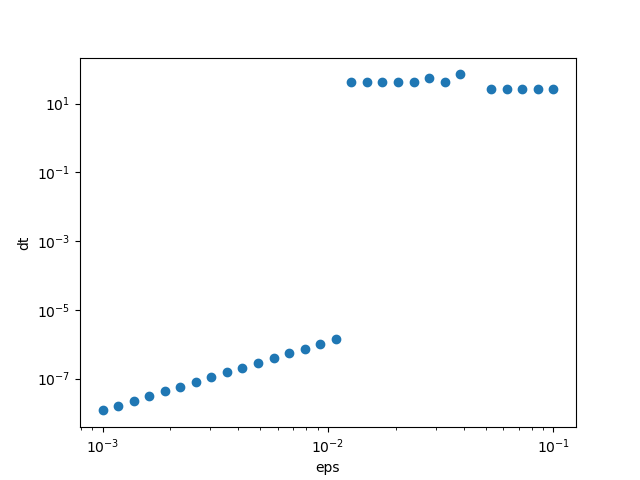

In [19]:
k = np.nanargmax(alphas[:, 0])

print(alphas[k, :])
dt = np.abs(Xgeo[k, 2] - Xgshe[k, :, 2])

plt.figure()
plt.scatter(epsilons, dt)
plt.xlabel("eps")
plt.ylabel("dt")
plt.yscale("log")
plt.xscale("log")
plt.savefig("/Users/richard/Downloads/timing2.png")
plt.show()

In [6]:
m = (~np.isnan(alphas[:, 0])) & (betas[:, 0] < 100)

<IPython.core.display.Javascript object>


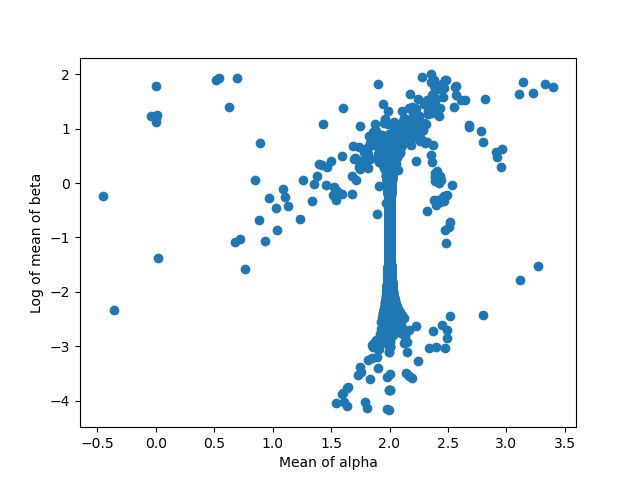

In [7]:
plt.figure()
# plt.hexbin(np.log10(alphas[m, 0]), np.log10(alphas[m, 1]), mincnt=1, gridsize=30, bins="log")
plt.scatter(alphas[m, 0], np.log10(betas[m, 0]))
# plt.colorbar()
# t = np.linspace(-3, 1, 100)
# plt.plot(t,t, c="red", ls='--')

plt.xlabel("Mean of alpha")
plt.ylabel("Log of mean of beta")
# plt.savefig("/Users/richard/Downloads/alpha_vs_beta.png")
plt.show()

In [22]:
from healpy.rotator import angdist

In [31]:
dsigma = [angdist(Xgshe[i, -1, 0:2], Xgeo[i, 0:2]) for i in range(Xgeo.shape[0])]

<IPython.core.display.Javascript object>


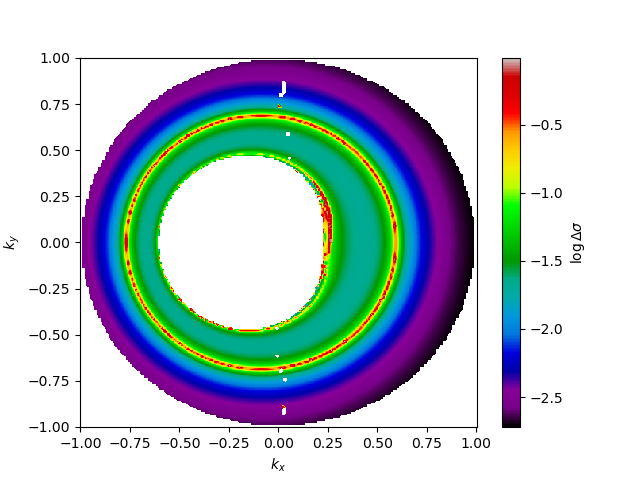

In [35]:
highZ = griddata(np.vstack([X.reshape(-1, ), Y.reshape(-1,)]).T, dsigma,
                 np.vstack([highX.reshape(-1, ), highY.reshape(-1,)]).T, method="linear"
                ).reshape(highX.shape)


# custom_mplstyle()

fig, ax = plt.subplots()
cm = ax.pcolormesh(highX, highY, np.log10(highZ), shading="auto", cmap="nipy_spectral", rasterized=True)
fig.colorbar(cm, ax=ax, label=r"$\log \Delta \sigma$")
ax.set_xlabel("$k_x$")
ax.set_ylabel("$k_y$")

plt.savefig("/Users/richard/Downloads/dsigma.png", dpi=450, bbox_inches="tight")
fig.show()

In [52]:
dt

array([1.24743336e+02, 1.22692525e+02, 1.18699731e-07, 1.25308076e+02,
       1.26414872e+02])

In [59]:
dt = np.abs(Xgeo[1502, 2] - Xgshe[1502, :, 2])

plt.figure()
plt.scatter(epsilons, dt)
plt.yscale("log")
plt.xscale("log")
plt.show()

<IPython.core.display.Javascript object>

(30, 5)

In [32]:
x[np.argmax(x), 0]

0.013759711605454725

In [348]:
s = 0
N = Xgeo.shape[0]


max_eps = np.full(N, np.nan)
for k in range(N):
    dt = np.abs(Xgshe[k, s, :, 2] - Xgeo[k, 2])

    if np.all(np.isnan(dt)):
        continue
    
    max_eps[k] = epsilons[np.nanargmax(dt)]

In [349]:
m = ~np.isnan(max_eps)

<IPython.core.display.Javascript object>


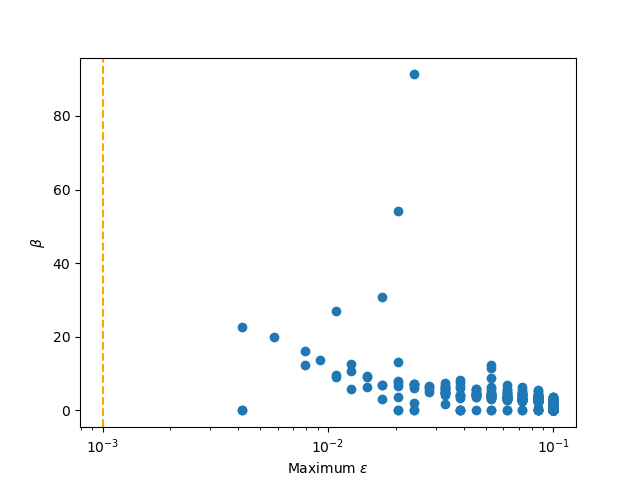

In [351]:
plt.figure()

plt.scatter(max_eps[m], betas[:, s, 0][m])
plt.xscale("log")

plt.xlabel(r"Maximum $\epsilon$")
plt.ylabel(r"$\beta$")
plt.axvline(1e-3, c="orange", ls="--")
# plt.yscale("log")
# plt.savefig("/Users/richard/Downloads/max_betas.png", dpi=300)
plt.show()

In [253]:
x = betas[:, 0, 0]
x[np.isnan(x)] = - np.infty
xstd = betas[:, 0, 1]
y = alphas[:, 0, 0]

In [254]:
ks = np.argsort(x)[::-1]
ks

array([ 7316, 21958, 16625, ..., 21701, 21702,     0])

<IPython.core.display.Javascript object>


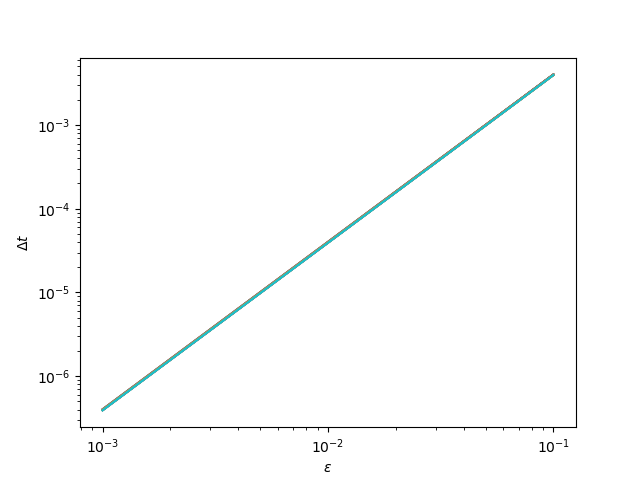

In [264]:
s = 0
plt.figure()

for i, k in enumerate(ks[1000:1020]):

    dt = np.abs(Xgeo[k, 2] - Xgshe[k, s, :, 2])
    plt.plot(epsilons, dt, label=r"$\beta = {:.2f} \pm {:.2f}, \alpha = {:.2f}$".format(x[k], xstd[k], y[k]))

plt.yscale("log")
plt.xscale("log")
plt.xlabel(r"$\epsilon$")
plt.ylabel(r"$\Delta t$")
plt.savefig("/Users/richard/Downloads/dts2.png", dpi=300, bbox_inches="tight")

plt.show()

In [198]:
Xgeo[k, :]

array([nan, nan, nan, nan])